# FBI Project

In [128]:
import pandas as pd
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
%matplotlib inline

## Loading data from excel

In [74]:
data = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', sheetname='13tbl8ny', skiprows = 4, skip_footer = 3)
data.head(10)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0.0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3.0
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1.0
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0.0


In [75]:
df = data.drop(data.columns[[0,4,12]], axis=1)
df

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,1861,0,0,0,0,0,12,2,10,0
1,2577,3,0,0,0,3,24,3,20,1
2,2846,3,0,0,0,3,16,1,15,0
3,97956,791,8,30,227,526,4090,705,3243,142
4,6388,23,0,3,4,16,223,53,165,5
5,4089,5,0,0,3,2,46,10,36,0
6,1781,3,0,0,0,3,10,0,10,0
7,118296,107,1,7,31,68,2118,204,1882,32
8,9519,9,0,2,4,3,210,16,188,6
9,18182,30,0,0,12,18,405,99,291,15


In [19]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,201.594828,1.566092,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172
std,4.500374e+05,2815.268504,18.303673,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000
75%,1.842750e+04,22.000000,0.000000,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000
max,8.396126e+06,52384.000000,335.000000,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000


## Predict property crimes

In [76]:
df.columns

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft'],
      dtype='object')

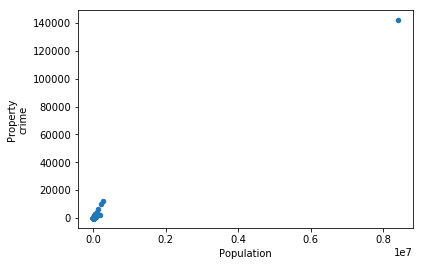

In [77]:
df.plot(x='Population', y='Property\ncrime',kind='scatter')

In [78]:
df_1 = df[['Population', 'Property\ncrime']]
df_1.head(5)

,Population,Property crime
0,1861,12
1,2577,24
2,2846,16
3,97956,4090
4,6388,223


In [116]:
lr = linear_model.LinearRegression()
Population = df_1['Population'].values.reshape(data.shape[0],1)
Property_crime = df_1['Property\ncrime'].values
model = lr.fit(Population, Property_crime) 
m = model.coef_[0]
b = model.intercept_
print ('formula: y = {0}x + {1}'.format(m, b))

formula: y = 0.016956630616734008x + 113.70298212789032


In [117]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(Population) - Property_crime) ** 2))

Mean squared error: 436173.35


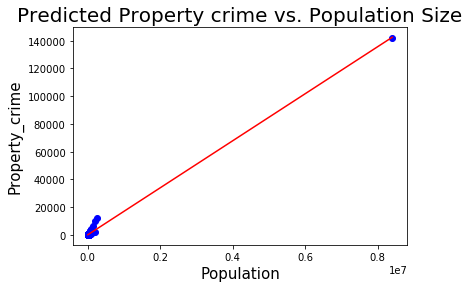

In [80]:
x = np.linspace(df_1.Population.min(), df_1.Population.max(), 100)  
f = model.intercept_ + model.coef_*x
plt.scatter(Population,Property_crime, color='blue', label='Training Data')
plt.plot(x,f,'r',label='Prediction')
plt.title('Predicted Property crime vs. Population Size', fontsize = 20)
plt.xlabel('Population', fontsize = 15)
plt.ylabel('Property_crime', fontsize = 15)
plt.show()

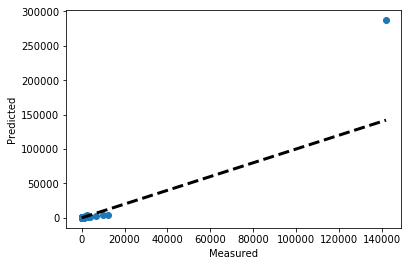

In [143]:
y=df_1['Property\ncrime'].values
predicted = cross_val_predict(lr, df_1.Population.values.reshape(df_1.shape[0],1), df_1['Property\ncrime'], cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 2.Predict property crimes for 2 variable: Population + Violent crime

In [82]:
df_2 = df[['Population','Violent\ncrime','Property\ncrime']]
df_2.head(5)

,Population,Violent crime,Property crime
0,1861,0,12
1,2577,3,24
2,2846,3,16
3,97956,791,4090
4,6388,23,223


In [83]:
df_2.describe()

,Population,Violent crime,Property crime
count,3.480000e+02,348.000000,348.000000
mean,4.003763e+04,201.594828,792.606322
std,4.500374e+05,2815.268504,7659.724746
min,5.260000e+02,0.000000,0.000000
25%,3.003000e+03,2.000000,40.500000
50%,7.233500e+03,6.000000,112.500000
75%,1.842750e+04,22.000000,341.000000
max,8.396126e+06,52384.000000,141971.000000


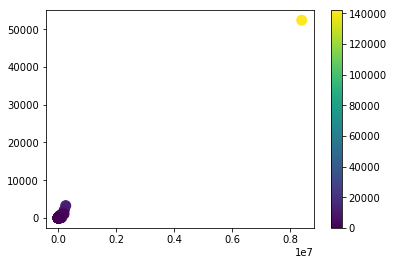

In [84]:
fig, ax = plt.subplots()
scat = ax.scatter(df_2['Population'].values,df_2['Violent\ncrime'].values, c=df_2['Property\ncrime'].values, marker='o',s=100)
fig.colorbar(scat)
plt.show()

In [109]:
X = df_2[['Population','Violent\ncrime']]
Y = df_2['Property\ncrime'].values
model1= lr.fit(X, Y) 
m1 = model1.coef_
b1 = model1.intercept_
print(m1,b1)

[-0.004826    3.48607908] 283.052518702


In [110]:
print("Mean squared error: %.2f"
      % np.mean((model1.predict(X) - Y) ** 2))

Mean squared error: 216116.92


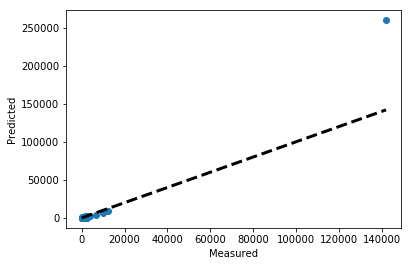

In [144]:
y2 = df_2['Property\ncrime'].values
predicted2 = cross_val_predict(lr, df_2[['Population','Violent\ncrime']], y,cv = 10)
fig, ax = plt.subplots()
ax.scatter(y, predicted2)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 3.Predict property crimes for 4 variable: Population + Murder and nonnegligent manslaughter  +	Rape (legacy definition)2 + Robbery +	Aggravated assault	

In [120]:
df_3 = data[['Population',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime']]
df_3.head(5)

,Population,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime
0,1861,0,0,0,0,12
1,2577,0,0,0,3,24
2,2846,0,0,0,3,16
3,97956,8,30,227,526,4090
4,6388,0,3,4,16,223


In [121]:
df_3.describe()

,Population,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,1.566092,5.864943,72.902299,121.261494,792.606322
std,4.500374e+05,18.303673,60.425452,1031.032873,1706.131730,7659.724746
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,0.000000,0.000000,0.000000,1.000000,40.500000
50%,7.233500e+03,0.000000,0.000000,1.000000,4.000000,112.500000
75%,1.842750e+04,0.000000,2.000000,5.000000,14.000000,341.000000
max,8.396126e+06,335.000000,1112.000000,19170.000000,31767.000000,141971.000000


In [124]:
X3 = df_3[['Population','Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault']]
Y3 = df_3['Property\ncrime'].values
model3= lr.fit(X3, Y3) 
m3 = model3.coef_
b3 = model3.intercept_
print(m3,b3)

[  1.21189893e-02   7.48268123e+01   6.12845922e+01  -5.63689035e-01
  -1.32770779e+00] 32.8684652312


In [125]:
print("Mean squared error: %.2f"
      % np.mean((model3.predict(X3) - Y3)**2))

Mean squared error: 58357.24


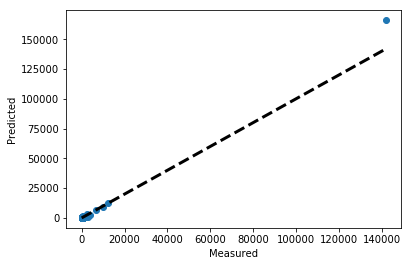

In [145]:
y3 =df_3['Property\ncrime'].values
predicted3 = cross_val_predict(lr, X3, y3,cv = 10)
fig3, ax3 = plt.subplots()
ax3.scatter(y, predicted3)
ax3.plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=3)
ax3.set_xlabel('Measured')
ax3.set_ylabel('Predicted')
plt.show()